In [1]:
#Importing libraries
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from dtreeviz.trees import *
import xgboost as xgb

In [2]:
#Defining the dataframe
df = pd.read_csv('data2.csv')
#Removing a column
df = df.drop(['Unnamed: 0'], axis = 1)

In [3]:
df

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,82.0,0.73885,9.0,0.027346,0.484014,0.0,4356.0,18.0,0.0,0.0,0.0,1.0,0.0,0.0
1,54.0,0.73885,4.0,0.138616,0.124875,0.0,3900.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0
2,41.0,0.73885,10.0,0.031219,0.449034,0.0,3900.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34.0,0.73885,9.0,0.138616,0.041578,0.0,3770.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38.0,0.73885,6.0,0.031219,0.134483,0.0,3770.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,22.0,0.73885,10.0,0.322677,0.325116,0.0,0.0,40.0,0.0,0.0,0.0,1.0,1.0,0.0
30714,27.0,0.73885,12.0,0.466795,0.304957,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0
30715,40.0,0.73885,9.0,0.466795,0.124875,0.0,0.0,40.0,0.0,0.0,0.0,1.0,1.0,1.0
30716,58.0,0.73885,9.0,0.027346,0.134483,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
#Defining the columns from feature selection
#Col1 from SelectKBest
col1 = ['age', 'education.num', 'marital.status', 'occupation','capital.gain', 'capital.loss',
        'hours.per.week','race_Black','sex_Male']

In [5]:
#Col2 from ExtraTreesClassifier
col2 = ['age', 'workclass', 'education.num', 'marital.status', 'occupation','capital.gain','capital.loss','hours.per.week','sex_Male']

In [6]:
#Col3 from PointBiserialCorrSelector
col3 = ['age', 'education.num', 'marital.status', 'occupation','capital.gain','hours.per.week','sex_Male']

In [63]:
#Defining X for each of the columns and y - target column
X1, X2, X3 = df[col1].values, df[col2].values, df[col3].values
y = df.iloc[:,13].values

In [8]:
def train(X, y, model):
    """
        This function will train a certain model for given X and y.
    :X: - numpy array
        The feature matrix.
    :y: - numpy array
        The target vector.
    :model: - string
        The name of the model used.
    """
    #Defining the model
    if model == 'GaussianNB':
        clf = GaussianNB()
    elif model == 'KNN':
        clf = KNeighborsClassifier()
    elif model == 'Logistic':
        clf = LogisticRegression(max_iter=1000)
    elif model == 'Decision':
        clf = DecisionTreeClassifier(random_state = 42)
    elif model == 'Random':
        clf = RandomForestClassifier(random_state = 42)
    elif model == 'Ada':
        clf = AdaBoostClassifier(random_state = 42)
    #Splitting the data in train and test with train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    #Call the fit function , which applies the Linear Regression model
    clf.fit( X_train, y_train)
    #Define a variable that stores the predictions of our model .
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    
    #Printing accuracy 
    print("Accuracy for " + str(clf) +" = %.2f" % (acc*100) )
    return clf, y_test, y_pred
    

In [9]:
def train2(X, y, model):
    """
         This function will first apply train function to X and y using the model specificated.
         Then it will print also the score for Cross Validation, F1 score, Precision and recall.
         It will also plot the confusion matrix.
         
    :return: 
        Returns the plot and the model trained.
    """
    #Training the model and returning model and y_pred
    mod, y_test, y_pred = train(X, y, model)
    
    #Cross validating our model to see how stable it is
    print("Cross validation mean score = %.2f" %(cross_val_score(mod, X, y, cv=10).mean()*100))
    #Printing some scores
    print("F1 score : %.2f " % (f1_score(y_test, y_pred) * 100))
    print("Recall score : %.2f" %(recall_score(y_test, y_pred) * 100))
    print("Precision score : %.2f" % (precision_score(y_test, y_pred) * 100))
    
    #Defining confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    #Setting figure size for plotting confusion matrix
    sns.set(rc={"figure.figsize":(6, 4)})
    return sns.heatmap(cf_matrix, annot=True), mod
    

## Training with KNeighboursClassifier, Gaussian Naive bayes, Logisitic Regression, Decision Tree, Random Forest and AdaBoost

In [10]:
#A list with the models which we'll use
models = ['KNN', 'GaussianNB', 'Logistic', 'Decision', 'Random', 'Ada']

In [11]:
print("Feature selection with SelectKBest")
#Training on the matrix X1 with features from SelectKBest model
for model in models:
    train(X1, y, model)

Feature selection with SelectKBest
Accuracy for KNeighborsClassifier() = 83.12
Accuracy for GaussianNB() = 78.91
Accuracy for LogisticRegression(max_iter=1000) = 83.66
Accuracy for DecisionTreeClassifier(random_state=42) = 80.99
Accuracy for RandomForestClassifier(random_state=42) = 83.78
Accuracy for AdaBoostClassifier(random_state=42) = 85.31


In [12]:
print("Feature selection with ExtraTreesClassifier")
#Training on the matrix X1 with features from ExtraTreesClassifier model
for model in models:
    train(X2, y, model)

Feature selection with ExtraTreesClassifier
Accuracy for KNeighborsClassifier() = 83.12
Accuracy for GaussianNB() = 78.94
Accuracy for LogisticRegression(max_iter=1000) = 83.83
Accuracy for DecisionTreeClassifier(random_state=42) = 81.38
Accuracy for RandomForestClassifier(random_state=42) = 84.23
Accuracy for AdaBoostClassifier(random_state=42) = 85.25


In [13]:
print("Feature selection with PointBiserialCorrSelector")
#Training on the matrix X1 with features from PointBiserialCorrSelector model
for model in models:
    train(X3, y, model)

Feature selection with PointBiserialCorrSelector
Accuracy for KNeighborsClassifier() = 81.74
Accuracy for GaussianNB() = 78.61
Accuracy for LogisticRegression(max_iter=1000) = 83.39
Accuracy for DecisionTreeClassifier(random_state=42) = 79.88
Accuracy for RandomForestClassifier(random_state=42) = 82.77
Accuracy for AdaBoostClassifier(random_state=42) = 85.02


The best results we got with the second method of Feature Selection - Extra Trees Classifier but also with SelectKBest (with 0.06% difference for AdaBoostClassifier).

I will choose to work with col2 list of features because from the bussines point of view they work better, and we have an overall better score for each of the models.

Also I will work with Random Forest and Ada Boost as the main models, as they had the highest accuracy.

Accuracy for RandomForestClassifier(random_state=42) = 84.23
Cross validation mean score = 78.63
F1 score : 66.09 
Recall score : 62.00
Precision score : 70.76


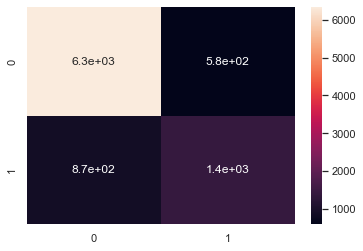

In [14]:
#Training with Random forest on X2 matrix with selected features.
#Returning confusion matrix and the model which we'll use later for grid search
conf1, clf1 = train2(X2, y, 'Random')

We got a 84.23 % accuracy which is very good, but the Recall score which means that only 62% of high income persons were predicted correctly, the rest 38% were predicted as not having high income.

Precision means that 70.76% of True Positive (high income) were predicted correctly while the rest 29 % of persons predicted as  having high income didn't actually have that. 

We also got a good score at cross validation of 10 batches.

Accuracy for AdaBoostClassifier(random_state=42) = 85.25
Cross validation mean score = 79.40
F1 score : 66.19 
Recall score : 58.23
Precision score : 76.66


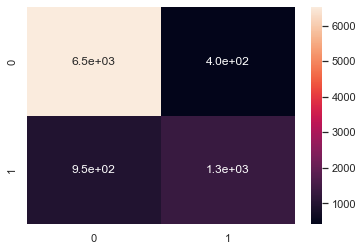

In [15]:
#Training with AdaBoost on X2 matrix with selected features.
#Returning confusion matrix and the model which we'll use later for grid search
conf2, clf2 = train2(X2, y, 'Ada')

With AdaBoost we have a slightly lower recall score, but a higher Precision Score.

In this situation, I think it would be better to have a higher recall score than a precision score. Our interest is to get as many positive high income persons as possible. Adding that, even though Precision score for AdaBoost is a lot higher, the F1 scores are approximatively the same - 66.09% and 66.19% and also the accuracy overall.

## Model tunning

#### Tunning Random Forest Classifier

I will now find the best paramaters for Random Forest and try to increase the accuracy score

In [16]:
#Defining the parameters for grid search
params_rf = {
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['log2', 'auto', 'sqrt'],
    'min_samples_leaf' : [2, 10, 30],
    'random_state' : [42, 69, 140],
    'n_estimators' : [50, 30, 80],
}

#Instantiate grid search for Random Forest
grid_rf = GridSearchCV(estimator = clf1,
                       param_grid = params_rf,
                       cv = 5,
                       n_jobs = -1)

In [17]:
#Splitting the data in train and test with train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size = 0.3, random_state = 42)
#Fitting the model and printing best score, best params and the score using best estimators
grid_rf = grid_rf.fit(X_train1, y_train1)
#Printing scores
print("Best score : %.2f" % (grid_rf.best_score_ *100) )
print("Best params : "+ str(grid_rf.best_params_))
clfRFC = grid_rf.best_estimator_
print('Test accuracy: %.2f' % (clfRFC.score(X_test1, y_test1) * 100))

Best score : 86.14
Best params : {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 80, 'random_state': 42}
Test accuracy: 85.77


We have found the best params and increased accuracy with 1.54%.

We can also see that the best score on training is different on test subset - which is very good and demonstrates that our model does not overfit on training data.

#### Tunning AdaBoost

In [18]:
#Defining the parameters for grid search 
params_ab = {
    'n_estimators':  [50, 69, 42, 80, 110, 150],
    'learning_rate': [0.1, 0.3, 0.6, 0.8, 0.01],
    'random_state' : [69, 42, 140, 50],
    'algorithm': ['SAMME', 'SAMME.R'],
}
#Instantiate grid search for AdaBoost
grid_ab = GridSearchCV(estimator = clf2,
                       param_grid = params_ab,
                       scoring = 'roc_auc',
                       cv = 5,
                       n_jobs = -1)

In [19]:
#Fitting the model and printing best score, best params and the score using best estimators for AdaBoost
grid_ab = grid_ab.fit(X_train1, y_train1)
#Printing scores
print("Best score : %.2f" % (grid_ab.best_score_ * 100) )
print("Best params : "+ str(grid_ab.best_params_))
clfAB = grid_ab.best_estimator_
print('Test accuracy: %.2f' % (clfAB.score(X_test1, y_test1) * 100))

Best score : 91.65
Best params : {'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 69}
Test accuracy: 85.82


The original accuracy is 85.25%

Even tho our model gets 91.65% as a best score - we can see that it overfits on training subset. The accuracy on test score has decreased a lot -5.83% which tells us this model may be unstable.

## Trying AdaBoost on original dataset

Let's see it feature selection actually helped us

In [64]:
#Defining X for original dataset (all of the columns)
X = df.iloc[:, :-1].values
#Splitting the data in train and test with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
#Training different models on original dataset
for model in ['Decision', 'Random', 'Ada']:
    train(X, y, model)

Accuracy for DecisionTreeClassifier(random_state=42) = 81.37
Accuracy for RandomForestClassifier(random_state=42) = 84.36
Accuracy for AdaBoostClassifier(random_state=42) = 85.32


We got pretty high accuracy score on original dataset too.

Accuracy for AdaBoostClassifier(random_state=42) = 85.32
Cross validation mean score = 79.65
F1 score : 67.02 
Recall score : 60.20
Precision score : 75.59


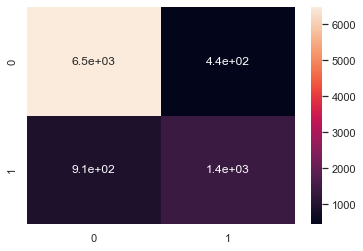

In [22]:
#Visualising other scores and confusion matrix
conf, clf = train2(X, y ,'Ada')

Surprisingly we have a little bit of an increased values on every score. Most importantly on recall - from 58 to 60.

That probably happened because the model is powerfull enough to select itself the best features.

In [23]:
#Instantiate grid_ab2
grid_ab2 = GridSearchCV(estimator = clf,
                       param_grid = params_ab,
                       scoring = 'roc_auc',
                       cv = 5,
                       n_jobs = -1)

In [24]:
#Fitting the model and printing best score, best params and the score using best estimators for AdaBoost
grid_ab2 = grid_ab2.fit(X_train, y_train)
#Printing scores
print("Best score : %.2f" % (grid_ab2.best_score_ * 100) )
print("Best params : "+ str(grid_ab2.best_params_))
clfAB2 = grid_ab2.best_estimator_
print('Test accuracy: %.2f' % (clfAB2.score(X_test, y_test) * 100))

Best score : 91.67
Best params : {'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 69}
Test accuracy: 85.76


Doing a grid search showed us that this model is also overfitting on train data, and the test accuracy is actually not higher than on the model with Feature Selection.

## Model interpretation

## As the best model I choosed Random Forest because of its stability

Now we'll interpret it using shap Explainer

In [93]:
#Setting plt style
plt.style.use('fast')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 0, 'Feature Importance on Random Forest')

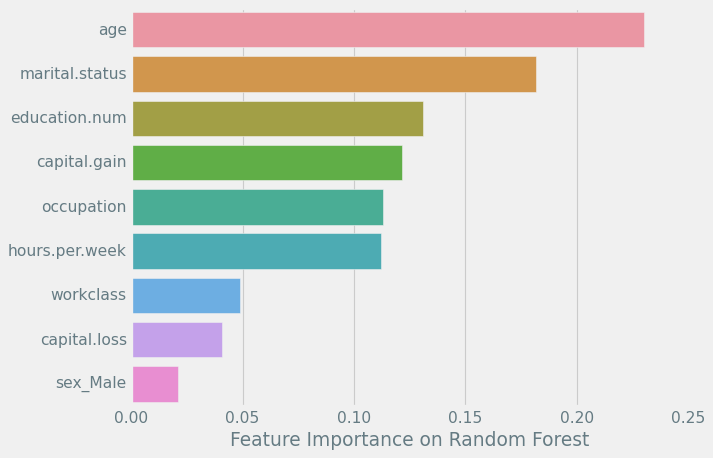

In [94]:
#Saving importances numbers
importances = clf1.feature_importances_
#Sorting in descending order
indices = np.argsort(importances)[::-1][:20]
#Plotting the importances by columns
ax = sns.barplot(importances[indices], [col2[i] for i in indices])
#Setting title
ax.set_xlabel('Feature Importance on Random Forest')

As we can see, age column is the most important feature with a 0.22 importance, followed by marital status of a person, education level .. and hours per week.

The least important are the gender and capitall loss

In [25]:
#Importing shap
import shap
shap.initjs()

In [28]:
#Creating the explainer
explainer = shap.Explainer(clf1.predict, X_train1, feature_names=col2)

In [29]:
#getting shap values
shap_values = explainer(X_test1)

Exact explainer: 9217it [48:52,  3.13it/s]                                                                             


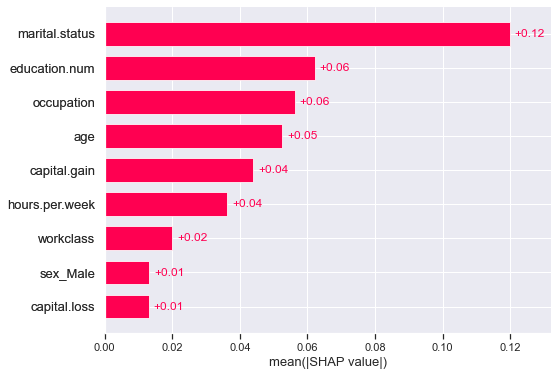

In [30]:
#plotting shap bar
shap.plots.bar(shap_values, max_display = 14)

### With shap we have almost the same columns with the highest influence on predicting a high income or not is given by 'marital.status' column, followed by 'education.num', 'occupation', 'age' etc.

#### Your marital status is a lot influencing if your income is above 50 K or not. Let's see how it affects the prediction. 

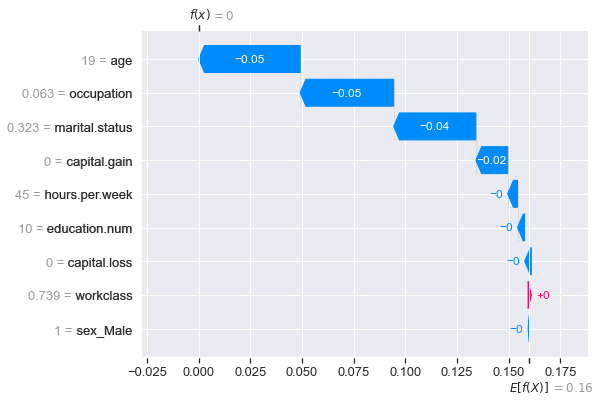

In [31]:
#plotting shap waterfall
shap.plots.waterfall(shap_values[0], max_display = 14)

### This waterfall plot shows us how much a single feature influenced the prediction
#### 

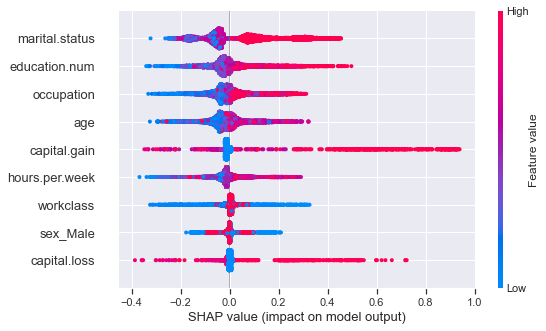

In [32]:
#plotting shap beeswarm
shap.plots.beeswarm(shap_values, max_display=14)

## The beeswarm plot gives us important insights.

Marital status - as when imputed with frequency, the most common status was Married with a civilian spouse. Analysing the plot we can see that a high feature value (married) has a positive impact on model output. In another words, if you are married you have a higher chance of having a high income than not being married. 

Education level - following the same logic, with a higher degree you are more likely to get more than 50K per year (as supposed in the first place)

Occupation - with this column is hard to make conlusions as they are not repartised in a certain order of difficulty of frequency

Age - we see a tendancy of having a positive impact on model output if the age value increases ( as supposed in the first place)

Capital gain - A high capital gain is clearly linked with the income of a person

Hours per week - here there is also a tendancy of having a higher chance of gaining more than 50K per year is you work more. As said - more hours = getting paid more

Workclass - this column is a bit ambiguos, as the most part (higher value) is asociated with private workers - the plot tells us that working to a private company wont give you a higher chance to have high income.

As we are already getting to columns less important - their shap values are getting more ambiguous to explain.

## Final accuracy with Random Forest - 85.77 %